In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random

% matplotlib inline

In [87]:
# Parameters
num_neurons = 10      # Number of neurons to use
num_datapoints = 10   # Number of datapoints to generate

num_burn_in = 500     # Burn-in period
num_samples = 500     # Number of samples generated from the Boltzmann-Gibbs distribution

learning_rate = 0.01  # Learning rate for gradient descent

In [88]:
# Generate the training dataset (the clamped datapoints)
X_c = np.random.binomial(1, 0.5, (num_datapoints, num_neurons)) * 2 - 1

In [89]:
# Calculate statistics
s1_c = np.sum(X_c, 0) / num_datapoints
s2_c = np.dot(X_c.T, X_c) / num_datapoints

In [90]:
# Initialize the network
w = np.random.normal(0, 1, (num_neurons, num_neurons))
theta = np.random.normal(0, 1, (num_neurons,))

In [93]:
# Generate samples from the Boltzmann-Gibbs distribution
s = np.random.binomial(1, 0.5, (num_neurons, 1)) * 2 - 1

X = np.empty((0, num_neurons))
for T in range(num_burn_in + num_samples):
    # Calculate the ratio of flipping
    flip_ratio = np.exp(2 * (np.dot(w, s) + theta) * s)

    # Take a random neuron
    neuron = random.randint(1, num_neurons) - 1
    if flip_ratio[neuron] < 1:
        s[neuron] *= -1

    if T > num_burn_in:
        X = np.vstack([X, s])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
# Calculate statistics
s1 = np.sum(X, 0) / num_samples
s2 = np.dot(X.T, X) / num_samples

In [8]:
# Calculate gradients
dLdtheta = s1_c - s1
dLdw = s2_c - s2

In [9]:
# Find the minimum
w = w + learning_rate * dLdtheta
theta = theta + learning_rate * dLdtheta

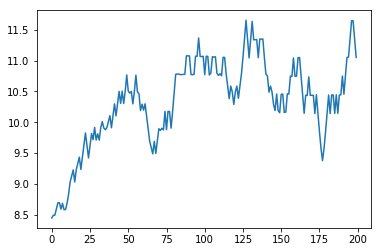

In [47]:
log_w = []
learning_rate = 0.05
num_samples = 500
num_burn_in = 500
num_neurons = 3

# Quickly setup trainingset
X_c = np.matrix([
    [1, 1, 1],
    [-1, 1, -1],
    [1, -1, -1],
    [-1, -1, 1]
])
s1_c = np.squeeze(np.asarray(np.sum(X_c, 0) / num_datapoints))
s2_c = np.dot(X_c.T, X_c) / num_datapoints

# Initialize the network
w = np.random.normal(0, 1, (num_neurons, num_neurons))
theta = np.random.normal(0, 1, (num_neurons,))

for _ in range(200):
    # Generate samples from the Boltzmann-Gibbs distribution
    s = np.random.binomial(1, 0.5, (num_neurons,)) * 2 - 1
    X = np.empty((0, num_neurons))
    for T in range(num_burn_in + num_samples):
        # Calculate the ratio of flipping
        flip_ratio = np.exp(2 * np.multiply((np.dot(w, s) + theta), s))

        # Take a random neuron
        neuron = random.randint(1, num_neurons) - 1
        if flip_ratio[neuron] < 1:
            s[neuron] *= -1

        if T > num_burn_in:
            X = np.vstack([X, s])

    # Calculate statistics
    s1 = np.sum(X, 0) / num_samples
    s2 = np.dot(X.T, X) / num_samples

    # Calculate gradients
    dLdtheta = s1_c - s1
    dLdw = s2_c - s2

    # Find the minimum
    w = w + learning_rate * dLdtheta
    theta = theta + learning_rate * dLdtheta
    log_w.append(np.sum(np.abs(w)))
    
plt.plot(log_w)